In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
messung10kOhm = pd.read_csv('messung2_10kOhm.csv', sep=',')
messung100kOhm = pd.read_csv('messung_100kOhm.csv', sep=',')

In [5]:
#df[df['Aktuell: Potenzial 1 (V)'] < -0.1] # 0.65 Sek.
messung10kOhm['Aktuell: Potenzial 1 (V)'] = messung10kOhm['Aktuell: Potenzial 1 (V)'].iloc[65:].reset_index(drop=True)

#messung100kOhm[messung100kOhm['Aktuell: Potenzial 2 (V)'] < -0.1] # 0.47 Sek.
messung100kOhm['Aktuell: Potenzial 1 (V)'] = messung100kOhm['Aktuell: Potenzial 1 (V)'].iloc[47:].reset_index(drop=True)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import micro, kilo

# Given values
C = 100 * micro  # 100 microfarads in farads
R1 = 10 * kilo   # 10 kiloohms in ohms
R2 = 100 * kilo  # 100 kiloohms in ohms
V0 = 5           # Initial voltage in volts

# Time constants
tau_1 = R1 * C
tau_2 = R2 * C

# Function to calculate the discharge curve
def corrected_voltage_after_time(tau, time):
    return V0 * np.exp(-time / tau)

# Time range for the simulation (in seconds)
simulation_time = 80  # Simulating for 60 seconds
sampling_rate = 100  # 100 values per second
time_values = np.linspace(0, simulation_time, simulation_time * sampling_rate)

# Calculating the discharge curve for both resistor values
discharge_curve_1 = corrected_voltage_after_time(tau_1, time_values)
discharge_curve_2 = corrected_voltage_after_time(tau_2, time_values)

# Creating DataFrame
df = pd.DataFrame({
    'Time (s)': time_values,
    'Voltage 10kΩ (V)': discharge_curve_1,
    'Voltage 100kΩ (V)': discharge_curve_2
})

# Plotting the discharge curves for each resistor separately on a linear x-axis
# 10 kΩ Resistor
# Re-creating the plots with annotations directly on the plot for both resistors

# Function to annotate the tau points directly on the plot
def annotate_tau_points(ax, tau, voltage_at_tau, label, color):
    # Annotate 1τ
    ax.annotate(f'1τ: {voltage_at_tau:.2f}V', xy=(tau, voltage_at_tau), xycoords='data',
                xytext=(15, 0), textcoords='offset points', arrowprops=dict(arrowstyle="->", color=color),
                color=color)
    # Annotate 5τ
    voltage_at_5tau = corrected_voltage_after_time(tau, 5 * tau)
    ax.annotate(f'5τ: {voltage_at_5tau:.2f}V', xy=(5 * tau, voltage_at_5tau), xycoords='data',
                xytext=(15, 0), textcoords='offset points', arrowprops=dict(arrowstyle="->", color=color),
                color=color)


# Print expected values after 1 tau and 5 tau for both resistor values
print(f"Voltage after 1τ for 10 kΩ Resistor: {corrected_voltage_after_time(tau_1, tau_1):.2f} V")
print(f"Voltage after 5τ for 10 kΩ Resistor: {corrected_voltage_after_time(tau_1, 5 * tau_1):.2f} V")
print(f"Voltage after 1τ for 100 kΩ Resistor: {corrected_voltage_after_time(tau_2, tau_2):.2f} V")
print(f"Voltage after 5τ for 100 kΩ Resistor: {corrected_voltage_after_time(tau_2, 5 * tau_2):.2f} V")
# Print the values of 1τ in seconds for both resistors
print(f"1τ for 10 kΩ Resistor: {tau_1:.2f} seconds")
print(f"1τ for 100 kΩ Resistor: {tau_2:.2f} seconds")

Voltage after 1τ for 10 kΩ Resistor: 1.84 V
Voltage after 5τ for 10 kΩ Resistor: 0.03 V
Voltage after 1τ for 100 kΩ Resistor: 1.84 V
Voltage after 5τ for 100 kΩ Resistor: 0.03 V
1τ for 10 kΩ Resistor: 1.00 seconds
1τ for 100 kΩ Resistor: 10.00 seconds


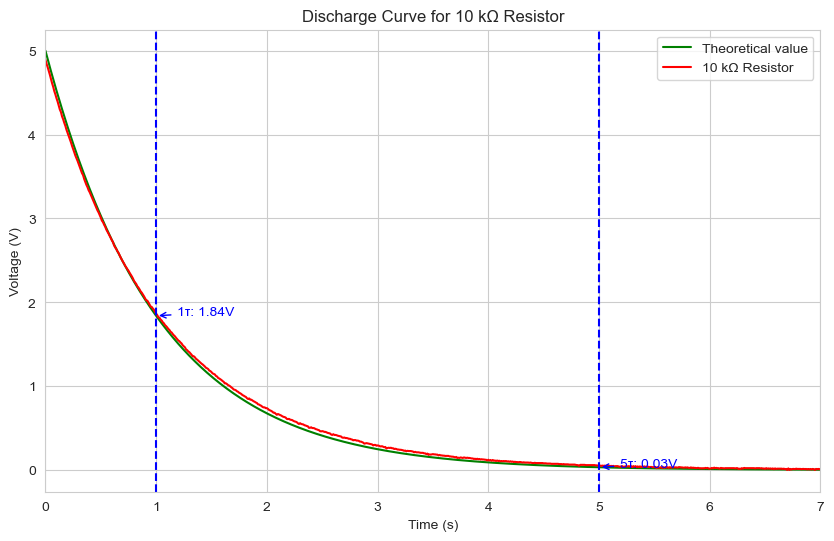

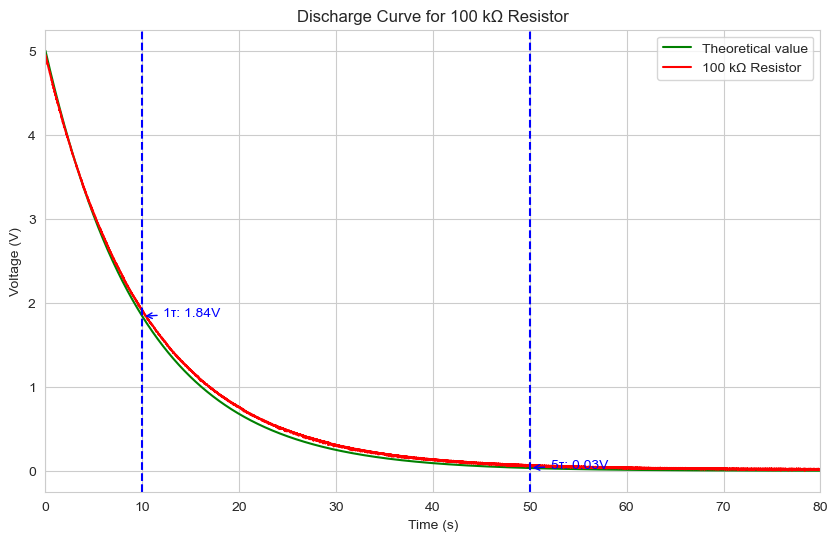

In [7]:

# Plot for 10 kΩ Resistor (Up to 10 Seconds)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Time (s)'], df['Voltage 10kΩ (V)'], label='Theoretical value', color='green')
ax.plot(messung10kOhm['Aktuell: Zeit (s)'], messung10kOhm['Aktuell: Potenzial 1 (V)'], label='10 kΩ Resistor', color='red')
ax.axvline(x=tau_1, color='blue', linestyle='--')
ax.axvline(x=5 * tau_1, color='blue', linestyle='--')
ax.set_xlim(0, 7)  # Limit x-axis to 10 seconds
ax.set_title('Discharge Curve for 10 kΩ Resistor')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.grid(True)
annotate_tau_points(ax, tau_1, corrected_voltage_after_time(tau_1, tau_1), '10kΩ', 'blue')
plt.legend()
plt.show()

# Plot for 100 kΩ Resistor
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Time (s)'], df['Voltage 100kΩ (V)'], label='Theoretical value', color='green')
ax.plot(messung100kOhm['Aktuell: Zeit (s)'], messung100kOhm['Aktuell: Potenzial 1 (V)'], label='100 kΩ Resistor', color='red')
ax.axvline(x=tau_2, color='blue', linestyle='--')
ax.axvline(x=5 * tau_2, color='blue', linestyle='--')
ax.set_xlim(0, simulation_time)  # Limit x-axis to 10 seconds
ax.set_title('Discharge Curve for 100 kΩ Resistor')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.grid(True)
annotate_tau_points(ax, tau_2, corrected_voltage_after_time(tau_2, tau_2), '100kΩ', 'blue')
plt.legend()
plt.show()

C:\Users\linus\AppData\Local\Temp\ipykernel_5800\1891366348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messung100kOhm_filtered['Log Voltage'] = np.log(messung100kOhm_filtered['Aktuell: Potenzial 1 (V)'])
C:\Users\linus\AppData\Local\Temp\ipykernel_5800\1891366348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messung10kOhm_filtered['Log Voltage'] = np.log(messung10kOhm_filtered['Aktuell: Potenzial 1 (V)'])


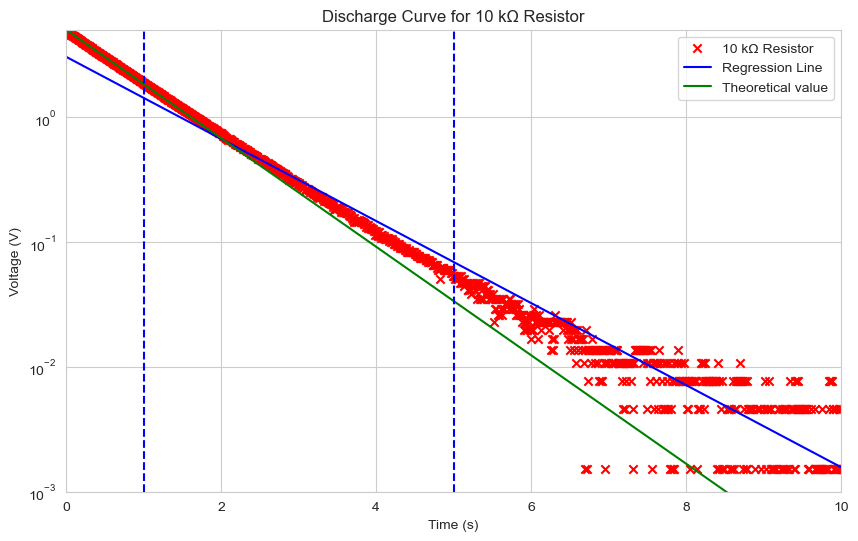

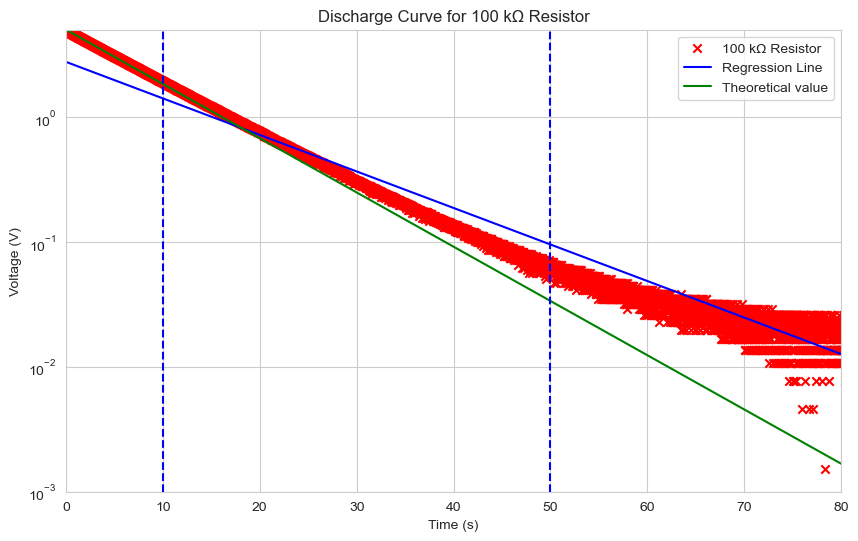

In [8]:
from scipy import stats

messung100kOhm_filtered = messung100kOhm[messung100kOhm['Aktuell: Potenzial 1 (V)'] > 0]
messung100kOhm_filtered['Log Voltage'] = np.log(messung100kOhm_filtered['Aktuell: Potenzial 1 (V)'])

messung10kOhm_filtered = messung10kOhm[messung10kOhm['Aktuell: Potenzial 1 (V)'] > 0]
messung10kOhm_filtered['Log Voltage'] = np.log(messung10kOhm_filtered['Aktuell: Potenzial 1 (V)'])

# Correcting the linear regression to use the logarithmically transformed voltage data
# Linear regression for 10k Ohm data
slope_10k, intercept_10k, _, _, _ = stats.linregress(
    messung10kOhm_filtered['Aktuell: Zeit (s)'],
    messung10kOhm_filtered['Log Voltage']
)

# Linear regression for 100k Ohm data
slope_100k, intercept_100k, _, _, _ = stats.linregress(
    messung100kOhm_filtered['Aktuell: Zeit (s)'],
    messung100kOhm_filtered['Log Voltage']
)

# Calculating fitted values for the regression lines
fitted_line_10k = intercept_10k + slope_10k * messung10kOhm_filtered['Aktuell: Zeit (s)']
fitted_line_100k = intercept_100k + slope_100k * messung100kOhm_filtered['Aktuell: Zeit (s)']

# Assuming df, tau_1, tau_2, and other variables are defined elsewhere in your code
# Plot for 10 kΩ Resistor
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(messung10kOhm['Aktuell: Zeit (s)'], messung10kOhm['Aktuell: Potenzial 1 (V)'], label='10 kΩ Resistor', color='red', marker='x')
ax.plot(messung10kOhm_filtered['Aktuell: Zeit (s)'], np.exp(fitted_line_10k), label='Regression Line', color='blue')
# Uncomment the below line if df and its columns are defined
ax.plot(df['Time (s)'], df['Voltage 10kΩ (V)'], label='Theoretical value', color='green')
ax.set_title('Discharge Curve for 10 kΩ Resistor')
ax.axvline(x=tau_1, color='blue', linestyle='--')
ax.axvline(x=5 * tau_1, color='blue', linestyle='--')
ax.set_xlim(0, 10)  # Limit x-axis to 10 seconds
ax.set_ylim(0.001, 5)  # Limit y-axis to 5 volts
ax.set_yticks([0.001, 0.01, 0.1, 1, 5])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.set_yscale('log')
ax.grid(True)
plt.legend()
plt.show()

# Plot for 100 kΩ Resistor
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(messung100kOhm['Aktuell: Zeit (s)'], messung100kOhm['Aktuell: Potenzial 1 (V)'], label='100 kΩ Resistor', color='red', marker='x')
ax.plot(messung100kOhm_filtered['Aktuell: Zeit (s)'], np.exp(fitted_line_100k), label='Regression Line', color='blue')
# Uncomment the below line if df and its columns are defined
ax.plot(df['Time (s)'], df['Voltage 100kΩ (V)'], label='Theoretical value', color='green')
ax.set_title('Discharge Curve for 100 kΩ Resistor')
ax.axvline(x=tau_2, color='blue', linestyle='--')
ax.axvline(x=5 * tau_2, color='blue', linestyle='--')
ax.set_xlim(0, simulation_time)  # Limit x-axis to 10 seconds
ax.set_ylim(0.001, 5)  # Limit y-axis to 5 volts
ax.set_yticks([0.001, 0.01, 0.1, 1, 5])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.set_yscale('log')
ax.grid(True)
plt.legend()
plt.show()


In [25]:
# welchen Wert bei 1 Tau und 5 Tau in Daten

messung10kOhm_filtered['Aktuell: Potenzial 1 (V)'].iloc[100] # 1.86557769775 bei 1 Tau
messung10kOhm_filtered['Aktuell: Potenzial 1 (V)'].iloc[500] # 0.0532150268555 bei 5 Tau

messung100kOhm_filtered['Aktuell: Potenzial 1 (V)'].iloc[1000] # 1.91116333008 bei 1 Tau
messung100kOhm_filtered['Aktuell: Potenzial 1 (V)'].iloc[5000] # 0.062370300293 bei 5 Tau

0.062370300293